Task 6.5

# Install and import all necessary libraries in your Jupyter notebook.
Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.
Use the elbow technique as shown in the Jupyter notebook for this Exercise.
Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.
If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.
Run the k-means algorithm.
Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.
Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
Propose what these results could be useful for in future steps of an analytics pipeline.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/asus/Documents/Career Foundry/Achievement 6'

In [4]:
df = pd.read_csv(r'C:\Users\admin\OneDrive - Aero Operating LLC\Documents\Career Foundry\Uber Lyft CSV Numbers Final.csv', index_col = False)

In [5]:
df.shape

(60392, 10)

In [6]:
df.head()

,hour,pickup,cab_type,name,price,distance,surge_multiplier,temperature,humidity,windSpeed
0,5,1,1,26,10.5,1.08,1.0,41.99,0.91,0.53
1,19,1,1,23,16.5,1.08,1.0,49.88,0.93,3.38
2,6,1,1,27,3.0,1.08,1.0,45.58,0.96,1.25
3,10,1,1,24,27.5,1.08,1.0,45.45,0.93,6.87
4,16,1,1,22,13.5,1.08,1.0,40.13,0.62,3.46


In [7]:
num_cl = range(1, 24) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-13063568.8647676,
 -9024061.961004391,
 -7170258.588178932,
 -6285657.22684833,
 -5562422.488481645,
 -5171667.042818145,
 -4833493.596639663,
 -4580636.659062945,
 -4330397.012612258,
 -4133771.04086758,
 -3981713.659304717,
 -3848298.6303371573,
 -3730051.315024383,
 -3639008.651630823,
 -3548308.6540393755,
 -3452365.7340134922,
 -3374394.8216016893,
 -3289835.0512731248,
 -3215717.4041582635,
 -3160306.1008752156,
 -3090326.663601614,
 -3051251.806496542,
 -2967181.0742706847]

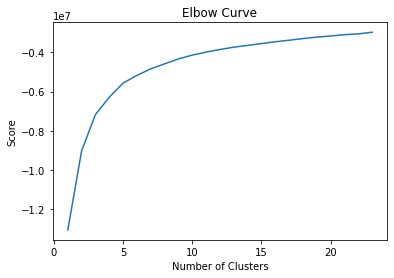

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 12) 

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=12)

In [12]:
df['clusters'] = kmeans.fit_predict(df)

In [13]:
df.head()

,hour,pickup,cab_type,name,price,distance,surge_multiplier,temperature,humidity,windSpeed,clusters
0,5,1,1,26,10.5,1.08,1.0,41.99,0.91,0.53,11
1,19,1,1,23,16.5,1.08,1.0,49.88,0.93,3.38,9
2,6,1,1,27,3.0,1.08,1.0,45.58,0.96,1.25,11
3,10,1,1,24,27.5,1.08,1.0,45.45,0.93,6.87,6
4,16,1,1,22,13.5,1.08,1.0,40.13,0.62,3.46,7


In [14]:
df['clusters'].value_counts()

0     9172
5     7419
3     6483
7     6129
2     5751
4     5514
11    4640
6     4290
1     3928
9     3139
8     2483
10    1444
Name: clusters, dtype: int64

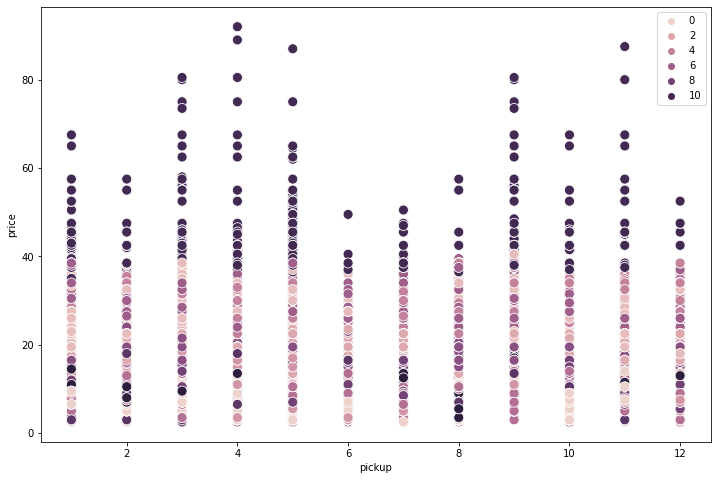

In [15]:
# Plot the clusters for the "price" and "pickup" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pickup'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('pickup') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

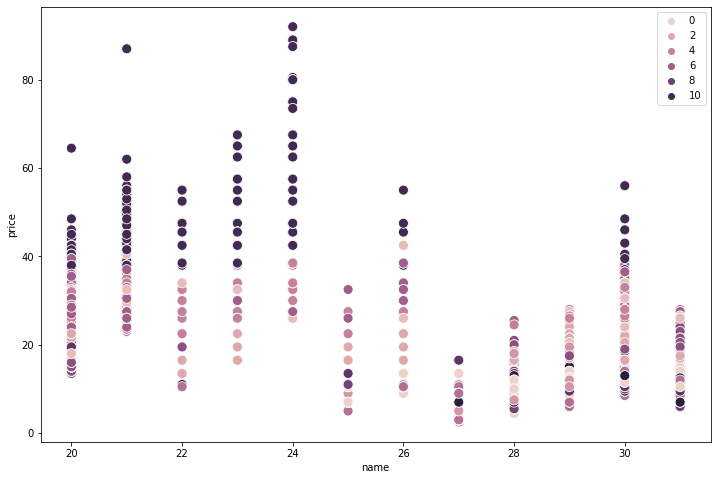

In [20]:
# Plot the clusters for the "name" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['name'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('name') 
plt.ylabel('price') 
plt.show()

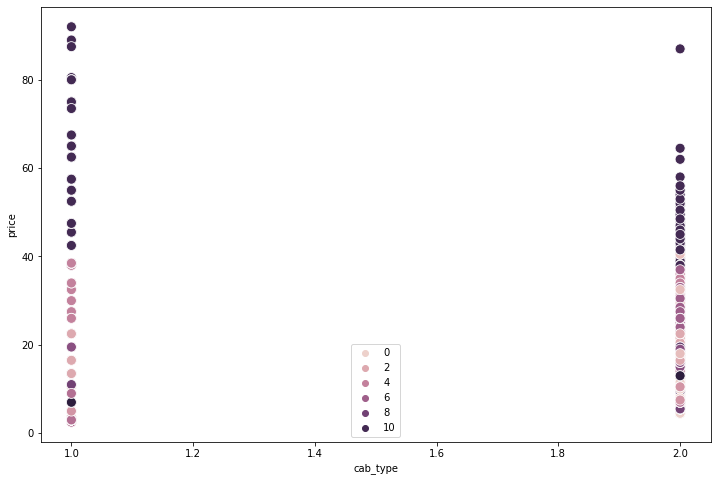

In [19]:
# Plot the clusters for the "cab_type" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cab_type'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('cab_type') 
plt.ylabel('price') 
plt.show()

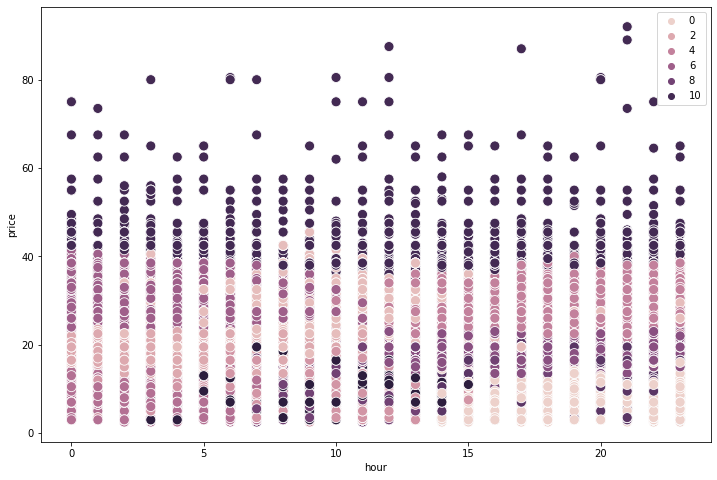

In [21]:
# Plot the clusters for the "hour" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['hour'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('hour') 
plt.ylabel('price') 
plt.show()

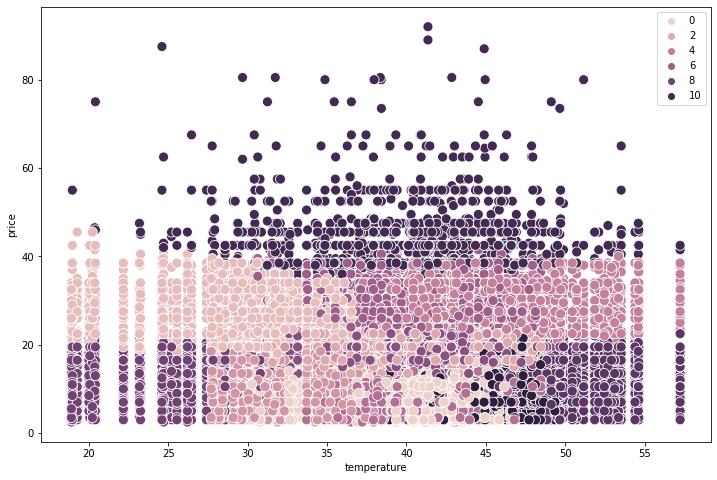

In [24]:
# Plot the clusters for the "temperature" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['temperature'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('temperature') 
plt.ylabel('price') 
plt.show()

In [17]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [18]:
df.groupby('cluster').agg({'cab_type':['mean', 'median'], 
                         'name':['mean', 'median'], 
                         'pickup':['mean', 'median'],
                          'price':['mean', 'median']})

cab_type              name           pickup             price  \
                 mean median       mean median      mean median       mean   
cluster                                                                      
dark purple  1.381847    1.0  23.087985   22.0  6.488611    7.0  18.424970   
pink         1.596380    2.0  28.012974   28.0  6.623855    7.0   9.024477   
purple       1.458758    1.0  22.543534   22.0  6.524440    6.0  27.142693   

                    
            median  
cluster             
dark purple   18.0  
pink           9.0  
purple        27.0

In [ ]:
# The Unsupervised k-Means Clustering Algorithm provided the opportunity to examine the relationship between multiple variables.
The data set was manipulated in such a way so as to assign numbers to different key variables. In the "cab type" category, Lyft was assigned 
1 and Uber 2. The different "pick up" locations and "name" (type of vehicles) variables were also assigned different numbers.
This allowed for an analysis to determine if relationships existed between different variables. Certain variables like time of day and weather
did not impact price. But clustering did exist with other variables; Cab Type - Lyft (1), Pick Up location - Fenway (4), Name - LUx Black XL etc.